In [95]:
#Import necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Visualization
import pandas
import seaborn as sns
import pandas_profiling as pp 
from pandas_profiling import ProfileReport
import plotly.express as px #visualization
from plotly.subplots import make_subplots #visualization
import plotly.graph_objects as go #visualization
from colorama import Fore, Back, Style #change strings color 

# Starting with EDA using pandas to get an initial overview of my data

In [96]:
#Read the CSV file
df= pd.read_csv('/Users/pree/Desktop/netflix_titles.csv')

In [97]:
#First glance of the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [98]:
df.shape

(8807, 12)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [100]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [101]:
#Create a pandas profile report
pp.ProfileReport(df) 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

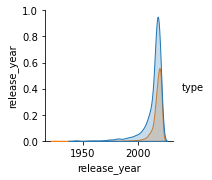

In [102]:
sns.pairplot(data=df, hue='type') 

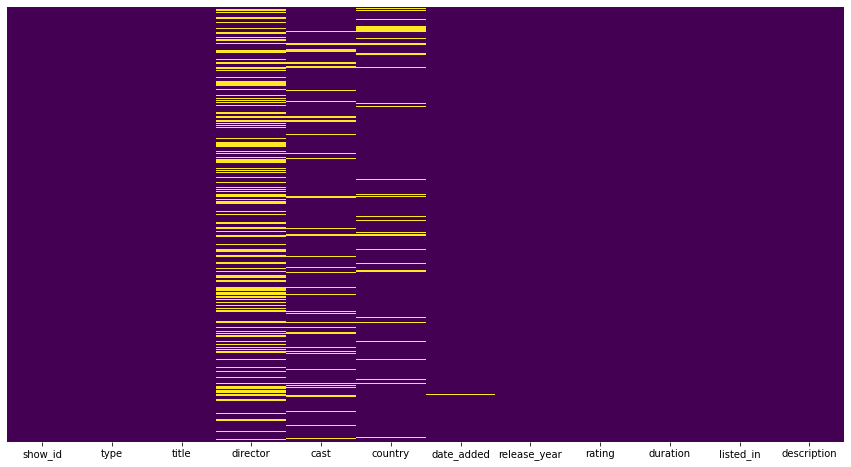

In [103]:
#Lets check for missing values. This should show the same values as in the pandas profile report
plt.figure(figsize=(15,8))
sns.heatmap(yticklabels=False, data=df.isnull(), cbar=False, cmap="viridis")
plt.show()

# Switching to SQL (This also gives one a chance to cross verify the results with the earlier python-pandas packages)

In [104]:
# import sqlalchemy and create a sqlite engine
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)
# export the dataframe as a table 'playstore' to the sqlite engine
df.to_sql("netflix", con =engine)

8807

In [105]:
## Test the code by select the complete table
sql='''

Select * from netflix
limit 5


''';
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head()


,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,1,s2,TV Show,Blood & Water,None,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",None,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,3,s4,TV Show,Jailbirds New Orleans,None,None,None,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,4,s5,TV Show,Kota Factory,None,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [106]:
## Query 1:- Select *

## Test the code by selecting the complete table

sql='''

Select * from netflix



''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,1,s2,TV Show,Blood & Water,None,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",None,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,3,s4,TV Show,Jailbirds New Orleans,None,None,None,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,4,s5,TV Show,Kota Factory,None,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [107]:
## Query 2:- Select distinct

sql='''

Select distinct(show_id) from netflix



''';
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head()

,show_id
0,s1
1,s2
2,s3
3,s4
4,s5


In [108]:
## Query 3:- Select where

sql='''

Select
distinct (title) from Netflix
where release_year > 2020



''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql

,title
0,Blood & Water
1,Ganglands
2,Jailbirds New Orleans
3,Kota Factory
4,Midnight Mass
...,...
587,What Happened to Mr. Cha?
588,Hilda
589,Polly Pocket
590,Love Is Blind


In [109]:
## Query 4:- Select and,or,not

sql='''

Select 
distinct(title) from netflix
where release_year > 2020 and title='Blood & Water' or release_year < 2021 and title='Kota Factory'and not country= 'India'



''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head()

,title
0,Blood & Water


In [110]:
## Query 5:- order by

sql='''

Select 
distinct(title) as name from netflix
order by title asc


''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql

,name
0,#Alive
1,#AnneFrank - Parallel Stories
2,#FriendButMarried
3,#FriendButMarried 2
4,#Roxy
...,...
8802,忍者ハットリくん
8803,海的儿子
8804,마녀사냥
8805,반드시 잡는다


In [111]:
## Query 6:- limit values

sql='''

Select * from netflix
limit 1



''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [112]:
## Query 7:- Min,Max,count,avg,sum

sql='''

Select
min(release_year) as min_release_year,
max(release_year) as max_release_year,
count(distinct release_year) as count_of_release_year,
round(avg(release_year),2) as avg_of_all_release_years,
sum(release_year) as avg_of_all_release_years
from netflix
limit 5



''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head()

,min_release_year,max_release_year,count_of_release_year,avg_of_all_release_years,avg_of_all_release_years
0,1925,2021,74,2014.18,17738885


In [113]:
## Query 8:- like

sql='''


Select distinct ' country that End with ia :- '|| country as Value from netflix
where country like"%ia"
union all
Select distinct 'country that Starts with ia :- '|| country as Value from netflix
where country like"ia%"
union all
Select distinct 'country that has ia :- '|| country as Value from netflix
where country like "%ia%"
union all
Select distinct 'country that starts and ends with a :- '|| country as Value from netflix
where country like "a%a%"


''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql

,Value
0,country that End with ia :- India
1,"country that End with ia :- United States, Gh..."
2,country that End with ia :- Australia
3,country that End with ia :- Nigeria
4,country that End with ia :- Russia
...,...
302,country that starts and ends with a :- Austral...
303,country that starts and ends with a :- Austral...
304,country that starts and ends with a :- Austral...
305,country that starts and ends with a :- Argenti...


In [114]:
## Query 9:- in

sql='''

select * from netflix
where country in ('India','United States','Australia')
order by country asc


''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,25,s26,TV Show,Love on the Spectrum,None,Brooke Satchwell,Australia,"September 21, 2021",2021,TV-14,2 Seasons,"Docuseries, International TV Shows, Reality TV",Finding love can be hard for anyone. For young...
1,108,s109,TV Show,Dive Club,None,"Aubri Ibrag, Sana'a Shaik, Miah Madden, Mercy ...",Australia,"September 3, 2021",2021,TV-G,1 Season,"Kids' TV, TV Dramas, Teen TV Shows","On the shores of Cape Mercy, a skillful group ..."
2,120,s121,TV Show,Heroes of Goo Jit Zu,None,"Jon Allen, Kellen Goff, Joe Hernandez, Kaiji Tang",Australia,"September 2, 2021",2021,TV-Y7,1 Season,"Kids' TV, TV Comedies","After a meteor crash, a group of zoo animals t..."
3,393,s394,Movie,A Second Chance: Rivals!,Clay Glen,"Emily Morris, Stella Shute, Eva Grados, India ...",Australia,"July 23, 2021",2021,PG,91 min,"Children & Family Movies, Sports Movies",Crushed when she doesn't qualify for the Olymp...
4,506,s507,Movie,This Little Love Of Mine,Christine Luby,"Saskia Hampele, Liam McIntyre, Lynn Gilmartin,...",Australia,"July 7, 2021",2021,TV-G,92 min,"International Movies, Romantic Movies",A workaholic lawyer returns to her island home...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,8791,s8792,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,"November 20, 2019",2011,R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...
3873,8793,s8794,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,"November 20, 2019",2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...
3874,8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
3875,8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [115]:
## Query 10:- between

sql='''

select * from Netflix where release_year between 2018 and 2021 order by release_year asc


''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,21,s22,TV Show,Resurrection: Ertugrul,None,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",Turkey,"September 22, 2021",2018,TV-14,5 Seasons,"International TV Shows, TV Action & Adventure,...",When a good deed unwittingly endangers his cla...
1,37,s38,TV Show,Angry Birds,None,"Antti Pääkkönen, Heljä Heikkinen, Lynne Guagli...",Finland,"September 16, 2021",2018,TV-Y7,1 Season,"Kids' TV, TV Comedies","Birds Red, Chuck and their feathered friends h..."
2,73,s74,Movie,King of Boys,Kemi Adetiba,"Sola Sobowale, Adesua Etomi, Remilekun ""Remini...",Nigeria,"September 14, 2021",2018,TV-MA,182 min,"Dramas, International Movies",When a powerful businesswoman’s political ambi...
3,94,s95,Movie,Show Dogs,Raja Gosnell,"Will Arnett, Ludacris, Natasha Lyonne, Stanley...","United Kingdom, United States","September 8, 2021",2018,PG,90 min,"Children & Family Movies, Comedies",A rough and tough police dog must go undercove...
4,96,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,"September 7, 2021",2018,TV-MA,97 min,"Documentaries, Music & Musicals","Using interviews and archival footage, this do..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,1468,s1469,Movie,What Happened to Mr. Cha?,Kim Dong-kyu,"Cha In-pyo, Cho Dal-hwan, Song Jae-ryong",South Korea,"January 1, 2021",2021,TV-MA,102 min,"Comedies, International Movies","With the peak of his career long behind him, a..."
3718,1551,s1552,TV Show,Hilda,None,"Bella Ramsey, Ameerah Falzon-Ojo, Oliver Nelso...","United Kingdom, Canada, United States","December 14, 2020",2021,TV-Y7,2 Seasons,Kids' TV,"Fearless, free-spirited Hilda finds new friend..."
3719,1696,s1697,TV Show,Polly Pocket,None,"Emily Tennant, Shannon Chan-Kent, Kazumi Evans...","Canada, United States, Ireland","November 15, 2020",2021,TV-Y,2 Seasons,Kids' TV,After uncovering a magical locket that allows ...
3720,2920,s2921,TV Show,Love Is Blind,None,"Nick Lachey, Vanessa Lachey",United States,"February 13, 2020",2021,TV-MA,1 Season,"Reality TV, Romantic TV Shows",Nick and Vanessa Lachey host this social exper...


In [116]:
## Query 11:- joins

sql='''

select
n1.show_id as Show_id_Table_1,
n2.type as Show_id_Table_2,
n2.title as Show_title_Table2
from netflix n1
join netflix n2 on n1.show_id = n2.show_id


''';

df_sql = pd.read_sql_query(sql,con=engine)
df_sql

,Show_id_Table_1,Show_id_Table_2,Show_title_Table2
0,s1,Movie,Dick Johnson Is Dead
1,s2,TV Show,Blood & Water
2,s3,TV Show,Ganglands
3,s4,TV Show,Jailbirds New Orleans
4,s5,TV Show,Kota Factory
...,...,...,...
8802,s8803,Movie,Zodiac
8803,s8804,TV Show,Zombie Dumb
8804,s8805,Movie,Zombieland
8805,s8806,Movie,Zoom


In [117]:
## Query 12:- unions

sql='''

select * from netflix where country='India'
union all
select * from netflix where country='United States'


''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,4,s5,TV Show,Kota Factory,None,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
1,24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
2,39,s40,TV Show,Chhota Bheem,None,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"September 16, 2021",2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ..."
3,50,s51,TV Show,Dharmakshetra,None,"Kashmira Irani, Chandan Anand, Dinesh Mehta, A...",India,"September 15, 2021",2014,TV-PG,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...","After the ancient Great War, the god Chitragup..."
4,66,s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,None,None,India,"September 15, 2021",2014,TV-G,1 Season,"Docuseries, International TV Shows",Explore the history and flavors of regional In...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,8791,s8792,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,"November 20, 2019",2011,R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...
3786,8793,s8794,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,"November 20, 2019",2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...
3787,8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
3788,8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [118]:
## Query 13:- case statements with years. This is similar to hot encoding in Python

sql='''

select
sum(case when release_year='2021' then 1 else 0 end) as Release_2021,
sum(case when release_year='2020' then 1 else 0 end) as Release_2020,
sum(case when release_year='2019' then 1 else 0 end) as Release_2019,
sum(case when release_year='2018' then 1 else 0 end) as Release_2018,
sum(case when release_year='2017' then 1 else 0 end) as Release_2017,
sum(case when release_year='2016' then 1 else 0 end) as Release_2016,
sum(case when release_year='2015' then 1 else 0 end) as Release_2015
from netflix



''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql

,Release_2021,Release_2020,Release_2019,Release_2018,Release_2017,Release_2016,Release_2015
0,592,953,1030,1147,1032,902,560


In [119]:
## Another example- case statements with countries.This is similar to hot encoding in Python

sql='''

select
sum(case when country='India' then 1 else 0 end) as Shows_in_India,
sum(case when country='United States' then 1 else 0 end) as Shows_in_United_States,
sum(case when country='South Africa' then 1 else 0 end) as Shows_in_South_Africa
from netflix





''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql

,Shows_in_India,Shows_in_United_States,Shows_in_South_Africa
0,972,2818,30


In [120]:
## Query 14:- Sub Queries

sql='''

select distinct(a.title) from (select * from netflix) a



''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql

,title
0,Dick Johnson Is Dead
1,Blood & Water
2,Ganglands
3,Jailbirds New Orleans
4,Kota Factory
...,...
8802,Zodiac
8803,Zombie Dumb
8804,Zombieland
8805,Zoom


In [121]:
## Query 15:- coalesce

##Helps us to handle null values, it replaces the null values with the data we feed after the comma

## syntax coalesce(col1name,submit value to replace the null value)

sql='''
select coalesce(release_year,0) as first_non_zero_value from netflix
limit 1




''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql

,first_non_zero_value
0,2020


In [122]:
## Another Coalesce example with turning null values under director to 0

sql='''

select coalesce(director,0) as Director from netflix


''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql

,Director
0,Kirsten Johnson
1,0
2,Julien Leclercq
3,0
4,0
...,...
8802,David Fincher
8803,0
8804,Ruben Fleischer
8805,Peter Hewitt


In [123]:
#Sum of non-null values in director column

sql='''

select count(distinct director) from netflix

''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql

,count(distinct director)
0,4528


In [124]:
## Query 16:- convert



sql='''
select cast(release_year as float) as first_non_zero_value from netflix



''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql

,first_non_zero_value
0,2020.0
1,2021.0
2,2021.0
3,2021.0
4,2021.0
...,...
8802,2007.0
8803,2018.0
8804,2009.0
8805,2006.0


In [125]:
## Query 17:- lag/lead



sql='''

select
title,
release_year,
case when release_year=lag(release_year) over (order by release_year asc) then 1 else 0 end as Back_to_Back
from netflix
order by release_year asc




''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head(100)

,title,release_year,Back_to_Back
0,Pioneers: First Women Filmmakers*,1925,0
1,Prelude to War,1942,0
2,The Battle of Midway,1942,1
3,Undercover: How to Operate Behind Enemy Lines,1943,0
4,Why We Fight: The Battle of Russia,1943,1
...,...,...,...
95,Rocky,1976,1
96,Sparkle,1976,1
97,Hitler - A Career,1977,0
98,A Bridge Too Far,1977,1


In [126]:
## Query 18:- Row Number



sql='''

select 
title,type,director,
ROW_NUMBER() OVER (ORDER BY
        title asc) as row_number
        from netflix



''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head(100)

,title,type,director,row_number
0,#Alive,Movie,Cho Il,1
1,#AnneFrank - Parallel Stories,Movie,"Sabina Fedeli, Anna Migotto",2
2,#FriendButMarried,Movie,Rako Prijanto,3
3,#FriendButMarried 2,Movie,Rako Prijanto,4
4,#Roxy,Movie,Michael Kennedy,5
...,...,...,...,...
95,37 Seconds,Movie,Hikari,96
96,3Below: Tales of Arcadia,TV Show,None,97
97,40 Sticks,Movie,Victor Gatonye,98
98,42 Grams,Movie,Jack C. Newell,99


In [127]:
## Query 19:- Dense Rank

sql='''

select a.value from (
Select 
distinct ' country that End with ia :- '|| country as Value,
DENSE_RANK() OVER (ORDER BY country asc) as rank from netflix
where country like"%ia"
)a
where rank=1

union all

select a.value from (
Select 
distinct ' first country that starts with a :- '|| country as Value,
DENSE_RANK() OVER (ORDER BY country asc) as rank from netflix
where country like"a%"
)a
where rank=1

union all

select a.value from (
Select 
distinct ' country that has a and minimum length 4 :- '|| country as Value,
DENSE_RANK() OVER (ORDER BY country asc) as rank from netflix
where country like"a__%"
)a
where rank=1

''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql


,Value
0,"country that End with ia :- , France, Algeria"
1,first country that starts with a :- Argentina
2,country that has a and minimum length 4 :- Ar...


In [128]:
## Query 20:- with

sql='''

with b as (
select 
a.country,
a.count_of_shows,
row_number () over (order by a.count_of_shows desc) as rank 
from
(
select 
count(distinct title) as count_of_shows,
country
from netflix
group by country
) a
)
select country as country_most_shows from b
where  b.rank=1


 '''   
df_sql = pd.read_sql_query(sql,con=engine)
df_sql

,country_most_shows
0,United States
